In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
# load data
df = pd.read_csv('ad_data.csv')

In [3]:
# Preprocessing: Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['campaign_type'], drop_first=True) # Adjust drop_first as per model requirements

In [4]:
# Split Data
X = df.drop('campaign_success', axis=1)
y = df['campaign_success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth = 3) # Adjust hyperparameter if the dataset requires it
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
# Model Evaluation

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.6

Confusion Matrix:
[[ 1 11]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.68      0.82      0.74        28

    accuracy                           0.60        40
   macro avg       0.42      0.45      0.43        40
weighted avg       0.52      0.60      0.55        40



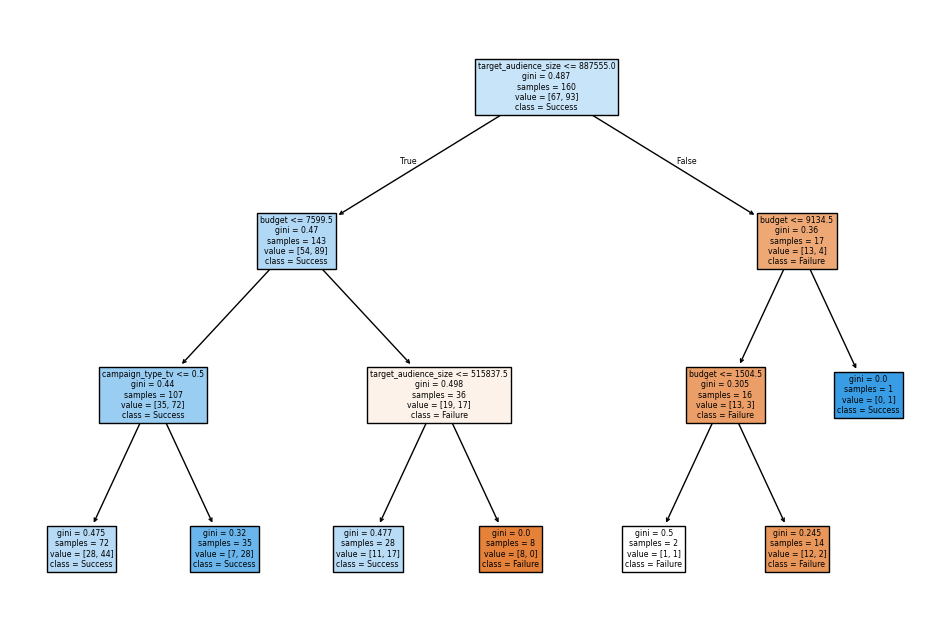

In [7]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=list(X.columns), class_names=['Failure','Success'], filled=True)
plt.show()

<Axes: >

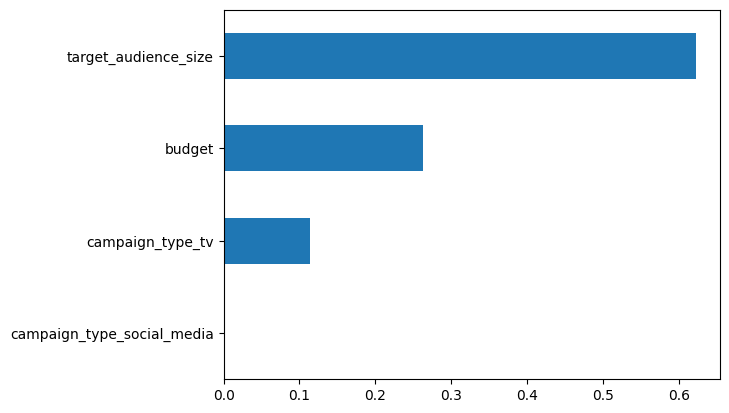

In [8]:
# Feature Importance: Assessing which features the model heavily weights. Use feature importance methods after hyperparameter fine-tuning as initial model metrics are sensitive to change
importance = pd.Series(model.feature_importances_, name = 'importance', index=X.columns).sort_values(ascending = True) # Higher score signifies greater relative importance
importance.plot(kind='barh')